In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:
# Calculate Distance between any two given points
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)


# Calculate distance from a given point to all other points
# and keep track of the respective classes for those distances
# and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances



# Get the "n" defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    return distances[:count]




# Takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 15)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    return prediction



# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [20]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
names = ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','target']
glass = pd.read_csv(url, header = None, names = names )

In [21]:
glass

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [22]:
features = glass.drop(['target'], axis = 1)

In [23]:
target = glass.drop(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], axis = 1)

In [24]:
features = (features - features.min())/(features.max() - features.min())

In [8]:
#target = (target - target.min())/(target.max() - target.min())

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.2)

In [26]:
correl = glass.corr('pearson')

In [27]:
abs(correl['target']).sort_values()

Ca           0.000952
K            0.010054
Si           0.151565
RI           0.164237
Fe           0.188278
Na           0.502898
Ba           0.575161
Al           0.598829
Mg           0.744993
Id number    0.877357
target       1.000000
Name: target, dtype: float64

In [28]:
f1 = 'Id number'
f2 = 'Mg'
f3 = 'Al'
f4 = 'Ba'
f5 = 'Na'
f6 = 'Fe'
f7 = 'RI'
f8 = 'Si'
f9 = 'K'
f10 = 'Ca'

basex = np.array(xtrain[[f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]])
basey = np.array(ytrain)

xtest = np.array(xtest[[f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]])
ytest = np.array(ytest)

In [29]:
basey = [row[0] for row in basey]
basey

[7,
 2,
 6,
 1,
 7,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 6,
 6,
 5,
 2,
 3,
 7,
 7,
 1,
 2,
 2,
 6,
 7,
 5,
 7,
 1,
 5,
 2,
 2,
 1,
 3,
 2,
 5,
 1,
 6,
 2,
 5,
 5,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 5,
 2,
 2,
 2,
 1,
 7,
 7,
 6,
 5,
 3,
 6,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 7,
 3,
 1,
 1,
 1,
 2,
 2,
 7,
 1,
 5,
 1,
 2,
 2,
 2,
 5,
 1,
 7,
 7,
 2,
 2,
 7,
 7,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 7,
 2,
 7,
 2,
 1,
 7,
 7,
 3,
 1,
 7,
 1,
 1,
 2,
 7,
 3,
 7,
 2,
 1,
 1,
 1,
 7,
 2,
 1,
 1,
 7,
 1,
 2,
 7,
 2,
 7,
 2,
 2,
 2,
 1,
 7,
 2,
 2,
 2,
 1]

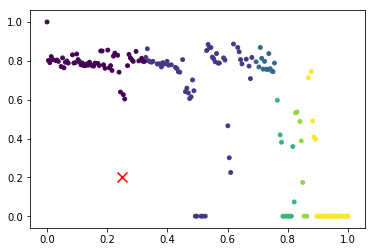

In [30]:
x = pd.DataFrame(basex)

plt.scatter(basex[:,0], basex[:,1], c=basey, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [31]:
accuracy(basex, basey, xtest, ytest)

'Accuracy: 81.3953488372093%'